# scientific Python environment test
This is a short test Jupyter notebook to make sure that you have a working Python environment capable of running all of the main packages we'll be using in the [Intro to Data Science in Python](http://github.com/tyarkoni/SSI2017) course at the [UT 2017 Summer Statistics Institute](https://stat.utexas.edu/training/ssi).


### Package imports
We'll begin by importing a few of the key packages we'll be working with. If you get an error while running the next code cell, you're probably missing the package in question. Assuming you've installed the [Anaconda distribution](https://www.continuum.io/downloads), obtaining the missing package should be as simple as running the following from the command line:

> conda install [packagename]

If that doesn't work, try:

> pip install [packagename]

If that still doesn't work, try consulting the oracles of Stack Overflow and/or Google, or shoot me an [email](mailto:tyarkoni@gmail.com).

Most of the packages used in this notebook should be installed with Anaconda by default. The exceptions are scikit-learn, seaborn  and statsmodels, which you can install from the command line with conda or pip as shown above (e.g., `conda install scikit-learn`).

In [3]:
# Import the main elements of the Python scientific computing stack
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import statsmodels as sm
%matplotlib inline

### Taking scientific Python for a spin
If the imports above went okay, the rest of the notebook should run without any problems. Everything from here on out is just meant to give you a taste of a few of the things we'll be covering in the course. I won't explain very much here, but rest assured that we'll cover all of this stuff (and much more) in detail, so don't worry if much of this seems incomprehensible.

#### Basic data manipulation
Some very simple array creation and manipulation calls in numpy, along with basic plotting using matplotlib.

In [4]:
## Create a random 100 x 10 array in numpy
a = np.random.normal(size=(100, 10))

# Print the first 3 rows. Just a bunch of meaningless numbers...
print(a[:3])

[[ 0.97386298 -0.0716212   1.70144015 -0.36007907 -0.02469031 -1.09512869
   0.72926761 -1.69787956 -0.63045537 -1.61908863]
 [ 1.20896393 -0.31898443 -1.61674653 -0.82860716  2.29984402  0.79757149
   1.3149266   0.70664016  1.26418981 -0.41387515]
 [ 0.4514393  -0.79715333 -1.14866404 -1.97787359  1.38269605 -1.60938166
  -0.96322484  0.59339428 -0.46747344 -0.09483167]]


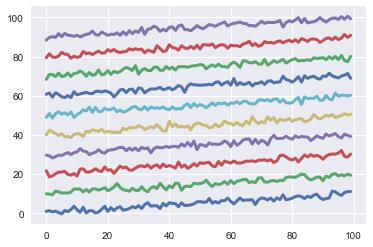

In [5]:
# Or something a little more orderly.
b = np.linspace(0, 100, num=1000)

# Reshape into a 2d array and add the a matrix in as noise
b = np.reshape(b, (10, 100)) + a.T

# Plot each row
for i in range(10):
    plt.plot(b[i, :], lw=3)

#### Pandas DataFrames
Pandas DataFrames are basically numpy arrays with labels (and a bunch of other useful functionality). They resemble R's native data frames. Here we load the famous "Iris" dataset using the data-loading utilities in seaborn.

In [6]:
# Load iris
df = sns.load_dataset("iris")

# Inspect the returned pandas DataFrame
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Visual data exploration using seaborn
Let's get a better sense of what's going on with our data. We can use the Seaborn package, which generates beautiful, informative plots with very little code. The pairplot lets us look at bivariate relationships for each pair of variables, broken down separately by iris species.

C:\Users\Christina\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


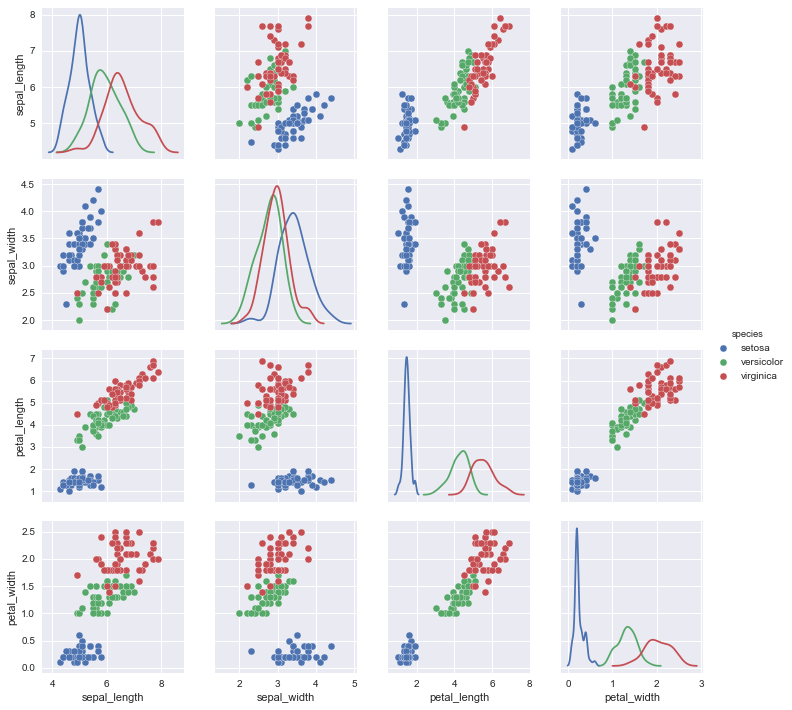

In [7]:
df = sns.load_dataset('iris')
pp = sns.pairplot(df, hue='species', diag_kind='kde')

#### Simple regression
For people coming from an R background, you can still have your formula-based model-fitting syntax using the `statsmodels` package.

In [8]:
# Linear regression using R-like syntax in statsmodels.
# We regress sepal length on the other features.
import statsmodels.formula.api as smf
mod = smf.ols(formula='sepal_length ~ sepal_width + petal_length + petal_width', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Mon, 22 May 2017   Prob (F-statistic):           8.59e-62
Time:                        13:25:35   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        1.8560      0.251      7.401      0.000         1.360     2.352
sepal_width      0.6508      0.067      9.765      0.000         0.519     0.783
petal_length     0.7091      0.057     12.502      0.000         0.597     0.821
petal_width     -0.5565      0.128     -4.363      0.000        -0.809    -0.304
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.504
Skew:                           0.007   Prob(JB):                        0.777
Kurtosis:                       2.716   Cond. No.                         54.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Classification
Let's do some very basic machine learning. We'll use a support vector machine to predict the species of each individual iris in our dataset from the observed sepal and petal variables.

In [9]:
# Classification analysis in scikit-learn. We assign labels to
# the individual iris observations based on petal width,
# sepal length, etc. -- holding out the true labels.
from sklearn.svm import SVC
np.random.seed(100)   # Hack to make sure we get labels in the desired order
k = 3                 # Number of clusters we want
# Exclude the ground truth from the feature space
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
# We'll set C too low to get more errors, for visualization purposes
clst = SVC(kernel='linear', C=0.0001)
df['labels'] = clst.fit(X, y).predict(X)

We can visualize the results by picking a pair of random features and comparing the ground truth to the model's predicted labels.

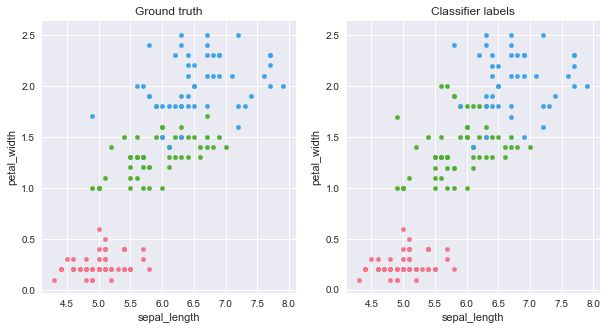

In [10]:
# Let's visualize the classifier results.

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
palette = sns.husl_palette(k)

# Plot ground truth on the left
c = 0   # Use a counter instead of vectorizing so it's clear what we're doing
for name, g in df.groupby('species'):
    g.plot(kind='scatter', x='sepal_length', y='petal_width',
           ax=axes[0], color=palette[c], title='Ground truth')
    c += 1

# Plot classifier labels on the right
c = 0
for name, g in df.groupby('labels'):
    g.plot(kind='scatter', x='sepal_length', y='petal_width',
           ax=axes[1], color=palette[c], title='Classifier labels')
    c += 1

How many cases did the classifier label correctly?

In [11]:
# Print classifier accuracy... not too shabby!
from sklearn.metrics import accuracy_score
acc = accuracy_score(df['species'], df['labels'])
print("K-means clustering accuracy: {:.2f}".format(acc))

K-means clustering accuracy: 0.92


92% accuracy seems pretty good. But let's see if we can learn something about where the classifier went wrong by looking at the confusion matrix. (We're adapting some code from the scikit-learn docs here.)

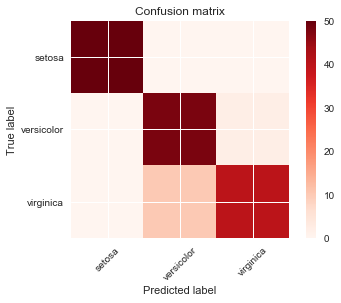

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['species'], df['labels'])

plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title("Confusion matrix")
plt.colorbar()
species = df['species'].unique()
tick_marks = np.arange(3)
plt.xticks(tick_marks, species, rotation=45)
plt.yticks(tick_marks, species)
plt.ylabel('True label')
plt.xlabel('Predicted label')